In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib as mp

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [2]:
train.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [3]:
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.00,196445.00,217529.00,202235.00,213779.00,222600.00,188533.00,211379.00,116512.00,116512.00,240000.00,240000.00,240000.00,240000.00,240000.00,240000.00
mean,149969.38,8.12,2.90,1.55,2.13,174.02,176.77,2423467.82,20.70,-99.51,0.06,0.06,0.09,0.44,0.40,2530838.35
std,86634.58,9.55,0.90,0.85,0.91,98.15,94.43,10567938.36,3.14,9.74,0.24,0.23,0.28,0.50,0.49,2152551.80
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,310000.00
25%,74930.75,0.00,2.00,1.00,1.00,90.00,102.00,24890.00,19.36,-100.98,0.00,0.00,0.00,0.00,0.00,952772.50
50%,149875.50,5.00,3.00,2.00,2.00,153.00,155.00,56383.00,19.54,-99.24,0.00,0.00,0.00,0.00,0.00,1850000.00
75%,225016.50,10.00,3.00,2.00,3.00,240.00,238.00,87838.00,20.74,-99.13,0.00,0.00,0.00,1.00,1.00,3390000.00
max,299999.00,80.00,10.00,3.00,4.00,439.00,439.00,50003999.00,83.03,121.04,1.00,1.00,1.00,1.00,1.00,12525000.00


In [4]:
#Transformamos las fechas
train['fecha'] = pd.to_datetime(train['fecha'])

In [5]:
train.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

In [6]:
train['garages'].head(10)

0   1.00
1   2.00
2   2.00
3   1.00
4   1.00
5   1.00
6   1.00
7   2.00
8   1.00
9    nan
Name: garages, dtype: float64

In [7]:
#Con fillna seteamos los valores de 'garages' nan en '0'.
train['garages'].fillna(0,inplace=True)
train['garages'].head(10)

0   1.00
1   2.00
2   2.00
3   1.00
4   1.00
5   1.00
6   1.00
7   2.00
8   1.00
9   0.00
Name: garages, dtype: float64

In [8]:
train['banos'].head(10)

0   2.00
1   2.00
2   2.00
3   1.00
4   1.00
5   1.00
6   2.00
7   3.00
8   1.00
9    nan
Name: banos, dtype: float64

In [286]:
# Filtramos los banos según sea casa ó terreno
#train['count'] = 1
#train[train['banos'].isnull()][['banos','count','tipodepropiedad']]
#train[train['tipodepropiedad'] == 'Terreno'][['banos','count']].count()

#train[train['tipodepropiedad'] == 'Terreno']['banos'].fillna(0,inplace=True)

#train[train['tipodepropiedad'] == 'Terreno'][['banos','count']].count()

In [ ]:
# Seteamos los banos Nan en '1'; ya que es dificil que una casa

In [9]:
train_filtrado = pd.DataFrame()
train_filtrado = train
train_filtrado.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.00,196445.00,217529.00,240000.00,213779.00,222600.00,188533.00,211379.00,116512.00,116512.00,240000.00,240000.00,240000.00,240000.00,240000.00,240000.00
mean,149969.38,8.12,2.90,1.30,2.13,174.02,176.77,2423467.82,20.70,-99.51,0.06,0.06,0.09,0.44,0.40,2530838.35
std,86634.58,9.55,0.90,0.96,0.91,98.15,94.43,10567938.36,3.14,9.74,0.24,0.23,0.28,0.50,0.49,2152551.80
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,310000.00
25%,74930.75,0.00,2.00,0.00,1.00,90.00,102.00,24890.00,19.36,-100.98,0.00,0.00,0.00,0.00,0.00,952772.50
50%,149875.50,5.00,3.00,1.00,2.00,153.00,155.00,56383.00,19.54,-99.24,0.00,0.00,0.00,0.00,0.00,1850000.00
75%,225016.50,10.00,3.00,2.00,3.00,240.00,238.00,87838.00,20.74,-99.13,0.00,0.00,0.00,1.00,1.00,3390000.00
max,299999.00,80.00,10.00,3.00,4.00,439.00,439.00,50003999.00,83.03,121.04,1.00,1.00,1.00,1.00,1.00,12525000.00


In [10]:
# Removemos los nulls y Nan
#for prop in train_filtrado.columns:
#    str_prop = str(prop)
#    if (prop != 'idzona') & (prop != 'lat') & (prop != 'lng') & (prop != 'direccion')\
#        & (prop != 'titulo') & (prop != 'descripcion'):
#        print(str_prop+" count null antes: "+str(train_filtrado[train_filtrado[str_prop].isnull()]['id'].count()))
#        train_filtrado = train_filtrado.loc[(~train_filtrado[str_prop].isnull())]
#        print(str_prop+" count null despues: "+str(train_filtrado[train_filtrado[str_prop].isnull()]['id'].count()))
#        print("--------------------")

In [11]:
train_filtrado.describe

<bound method NDFrame.describe of             id                                             titulo  \
0       254099                                  depto. tipo a-402   
1        53461                     condominio horizontal en venta   
2       247984              casa en venta urbi 3 recamaras tonala   
3       209067  casa sola en toluca zinacantepec con credito i...   
4       185997                                     paseos del sol   
5       126147                     departamento en venta taxqueña   
6       139233                 de oportunidad casa en san lorenzo   
7         5013  casa emilia en venta en selvamar playa del carmen   
8        44962  pre- venta preciosos depas 2 recamaras con sub...   
9       134537                                            terreno   
10       51180                                      mi 2° credito   
11      103293  departamento en venta, san pedro garza garcia,...   
12       47890             hermosa casa en zibata queretaro 170m²   


## ¿Cual es el periodo cubierto por las fechas?

In [12]:
print("Fecha Min.: ", train['fecha'].min())
print("Fecha Max.: ", train['fecha'].max())

Fecha Min.:  2012-01-01 00:00:00
Fecha Max.:  2016-12-31 00:00:00


## ¿Cómo se distribuyen las publicaciones de propiedades por año?

Text(0.5, 1.0, 'Publicaciones por año')

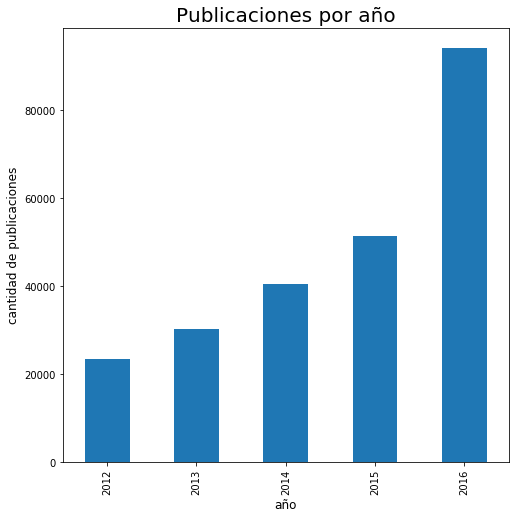

In [487]:
prop_total = train
ax = prop_total['fecha'].dt.year.value_counts().sort_index().plot.bar(figsize=(8,8))
ax.set_xlabel('año',fontsize=12)
ax.set_ylabel('cantidad de publicaciones',fontsize=12)
ax.set_title('Publicaciones por año',fontsize=20)

In [14]:
# Diferenciamos mes y año
prop = train
prop['year'] = train['fecha'].dt.year
prop['month'] = prop['fecha'].dt.month

In [15]:
prop_2012 = train[train['fecha'].dt.year == 2012]
prop_2013 = train[train['fecha'].dt.year == 2013]
prop_2014 = train[train['fecha'].dt.year == 2014]
prop_2015 = train[train['fecha'].dt.year == 2015]
prop_2016 = train[train['fecha'].dt.year == 2016]

Text(0.5, 1.0, 'Publicaciones por mes según año')

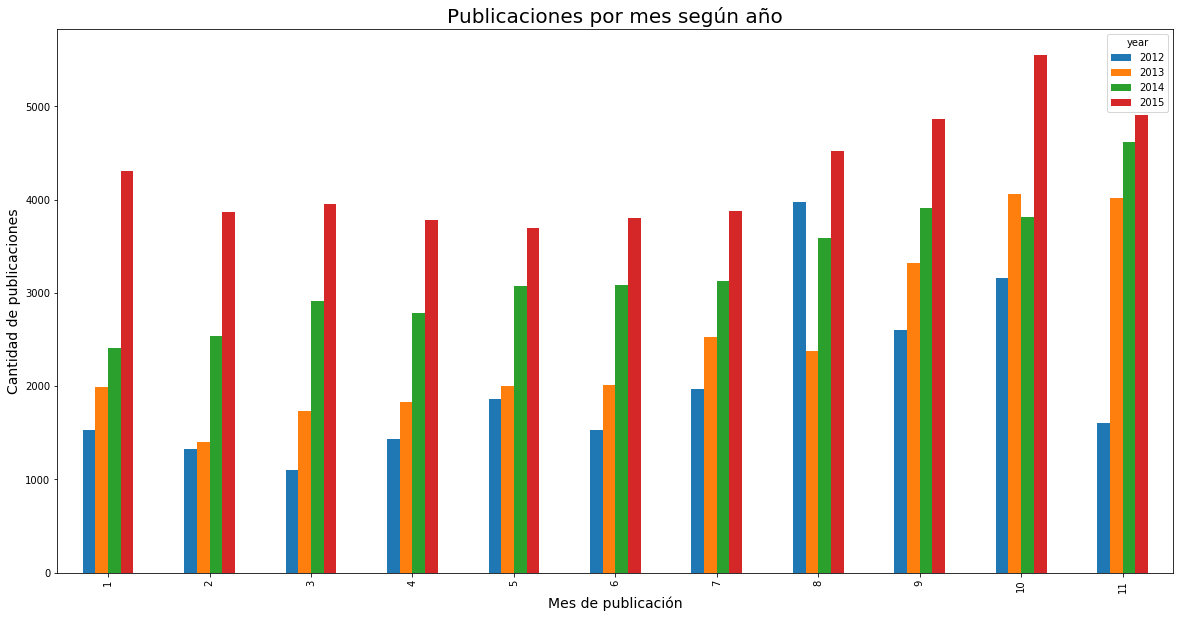

In [489]:
# Removemos las publicaciones de diciembre por tenes en el último a año un valor muy elevado
prop2 = prop[(prop['year'] != 2016) & (prop['month'] != 12)]
ax2 = prop2.groupby(by=['year','month']).count()['id'].unstack().transpose()\
.plot.bar(figsize=(20,10))
ax2.set_xlabel('Mes de publicación',fontsize=14)
ax2.set_ylabel('Cantidad de publicaciones',fontsize=14)
ax2.set_title('Publicaciones por mes según año',fontsize=20)

## ¿Cualés son los diferentes tipos de propiedad y cómo se distribuyen sobre el total?

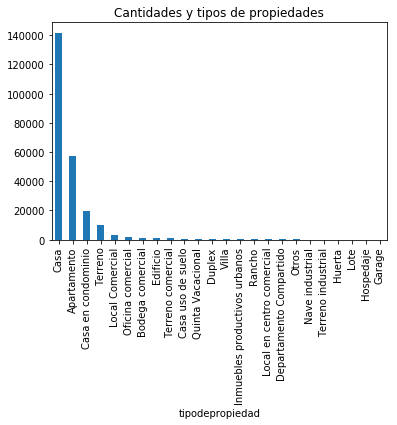

In [17]:
prop.groupby('tipodepropiedad').count()\
['id'].sort_values(ascending=False).plot.bar(title="Cantidades y tipos de propiedades")
# Se puede ver que la gran mayoría de publicaciones corresponde a propiedades del tipo 'Casa'

## ¿Qué relación existe entre el precio, los metros cuadrados y la cantidad de habitaciones de los departamentos?

In [18]:
# Seteamos el precio en dolares
cotizacion_hoy = 19.54
prop['precio_USD'] = prop['precio'] / cotizacion_hoy

print(prop['precio_USD'].head(2))
print(prop['precio'].head(2))

prop['precioXmt'] = prop['precio_USD']/prop['metrostotales']

0   116325.49
1   184237.46
Name: precio_USD, dtype: float64
0   2273000.00
1   3600000.00
Name: precio, dtype: float64


In [19]:
deptos = prop[prop['tipodepropiedad'] == 'Apartamento']
deptos[['antiguedad','precioXmt','metrostotales','precio_USD','habitaciones']].describe()
# Vemos que el 75% de los departamentos tiene hasta 3 habitaciones

,antiguedad,precioXmt,metrostotales,precio_USD,habitaciones
count,48290.00,29348.00,29348.00,57341.00,56347.00
mean,8.36,1163.48,117.91,141441.59,2.39
std,9.52,746.75,67.70,119896.35,0.63
min,0.00,44.78,15.00,15864.89,1.00
25%,1.00,660.49,70.00,53735.93,2.00
50%,5.00,1038.21,97.00,101807.98,2.00
75%,10.00,1516.36,145.00,190973.64,3.00
max,80.00,37529.85,438.00,640736.95,10.00


In [20]:
(prop.groupby('habitaciones').count()['id'])/prop['habitaciones'].count()*100

habitaciones
1.00     2.33
2.00    26.57
3.00    56.03
4.00    11.52
5.00     2.11
6.00     0.77
7.00     0.25
8.00     0.18
9.00     0.08
10.00    0.15
Name: id, dtype: float64

Text(0.5, 1.0, 'Distribución del precio por metro x metrostotales según cantidad de habitaciones')

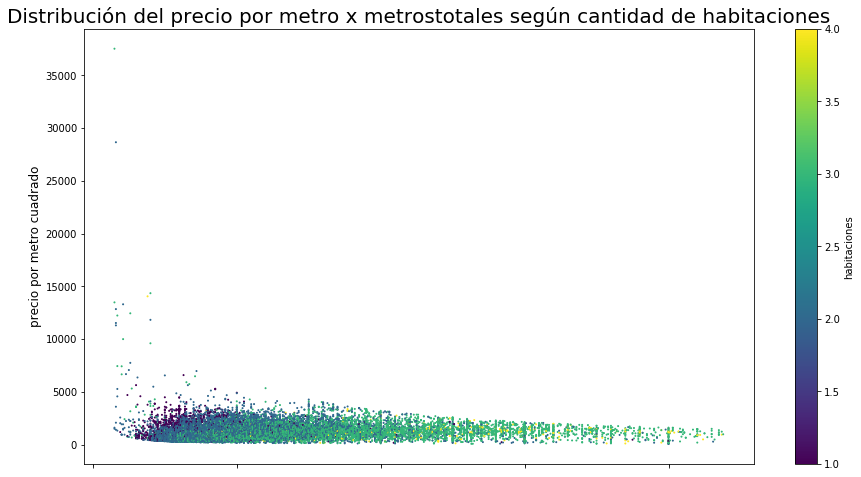

In [470]:
r = deptos[['precioXmt','metrostotales','habitaciones']]
# Sacamos los NaN
r = r[~r['metrostotales'].isna()]
# Sacamos los que tienen menos de max_hab habitaciones, ya que son casos aislados
max_hab = 5
r = r[r['habitaciones'] < max_hab]
r = r.sort_values(by=['metrostotales'],ascending=True)
r = r.plot.scatter(x='metrostotales',y='precioXmt',c='habitaciones',colormap='viridis',figsize=(15,8),s=1)
r.set_ylabel('precio por metro cuadrado',fontsize=12)
r.set_xlabel('metros totales',fontsize=12)
r.set_title('Distribución del precio por metro x metrostotales según cantidad de habitaciones',fontsize=20)

In [471]:
#Para exportar la imagen generada en el plot
fig = r.get_figure()
fig.savefig('/tmp/img_export.png')

## ¿Cómo se distribuyen las publicaciones de deptos según los metros totales?

In [23]:
# Vamos a estudiar los departamentos
deptos = prop[prop['tipodepropiedad'] == 'Apartamento']
deptos['precioXmt'] = deptos['precio_USD'] / deptos['metrostotales']

/home/lucas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribución metros x precio USD')

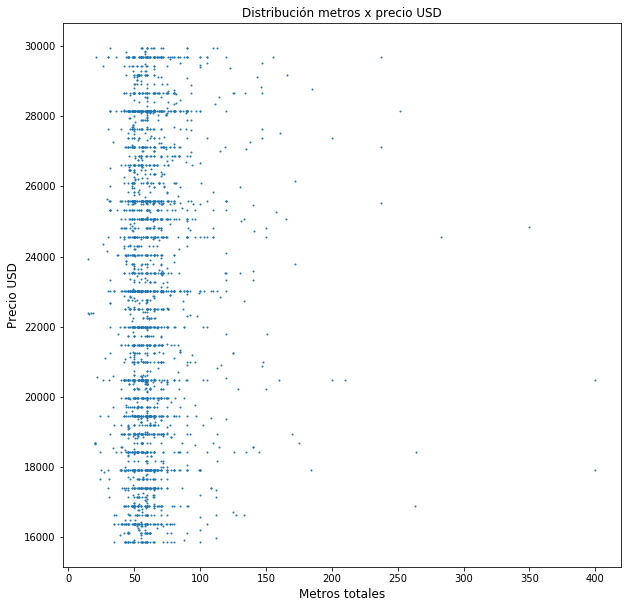

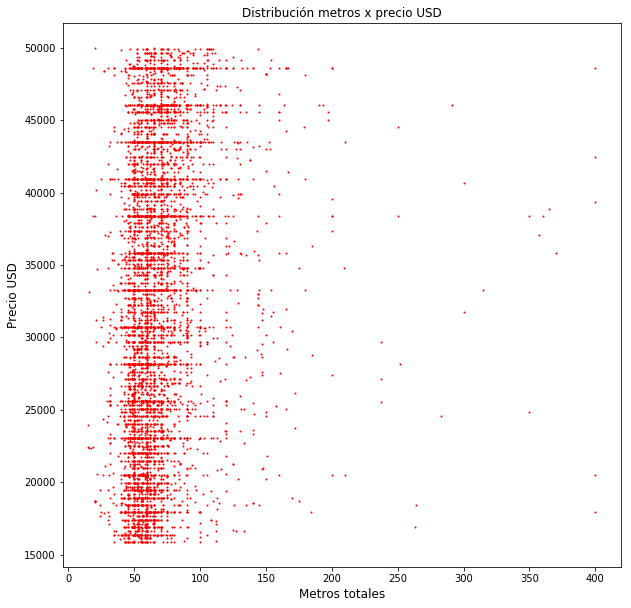

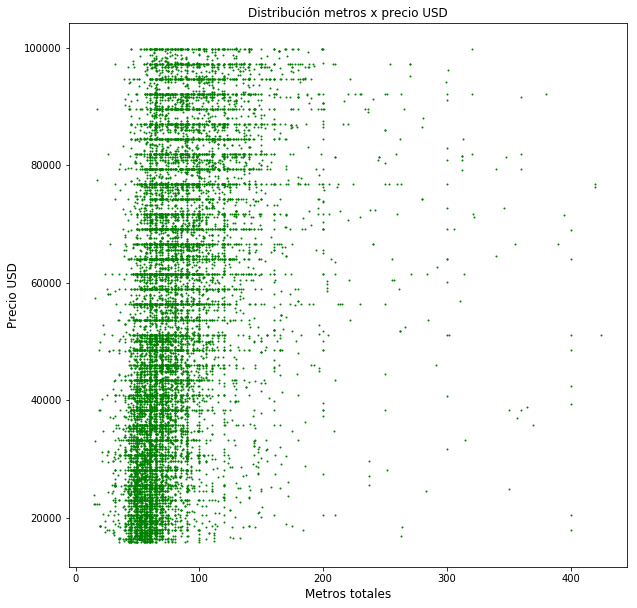

In [472]:
r = deptos[['precioXmt','metrostotales','precio_USD']]
limite1 = 30000
limite2 = 50000
limite3 = 100000
#Saco los NaN
r = r[~r['metrostotales'].isna()]
r2 = r[r['precio_USD'] < limite1]
r2 = r2.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,figsize=(10,10))
r2.set_xlabel('Metros totales',fontsize=12)
r2.set_ylabel('Precio USD',fontsize=12)
r2.set_title('Distribución metros x precio USD')

r3 = r[r['precio_USD'] < limite2]
r3 = r3.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,c='red',figsize=(10,10))
r3.set_xlabel('Metros totales',fontsize=12)
r3.set_ylabel('Precio USD',fontsize=12)
r3.set_title('Distribución metros x precio USD')

r4 = r[r['precio_USD'] < limite3]
r4 = r4.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=1,c='green',figsize=(10,10))
r4.set_xlabel('Metros totales',fontsize=12)
r4.set_ylabel('Precio USD',fontsize=12)
r4.set_title('Distribución metros x precio USD')

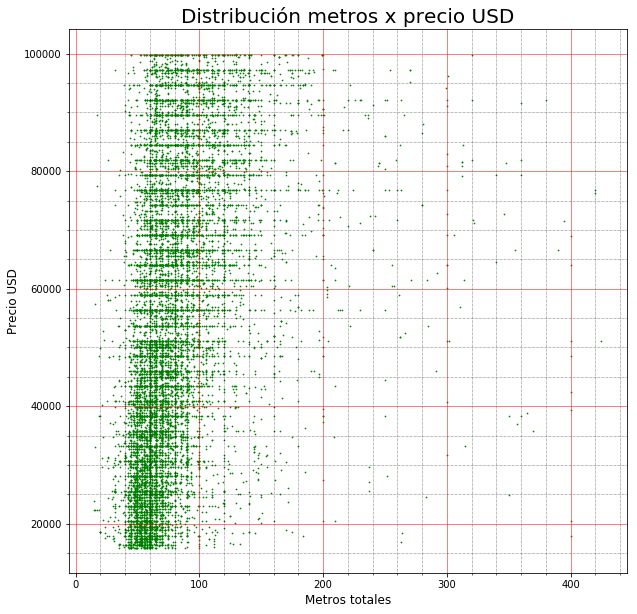

In [483]:
r4 = r[r['precio_USD'] < limite3]
r4 = r4.sort_values('metrostotales').plot.scatter(x='metrostotales',y='precio_USD',s=0.5,c='green',figsize=(10,10))
r4.set_xlabel('Metros totales',fontsize=12)
r4.set_ylabel('Precio USD',fontsize=12)
r4.set_title('Distribución metros x precio USD',fontsize=20)

# Turn on the minor TICKS, which are required for the minor GRID
r4.minorticks_on()
# Customize the major grid
r4.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
r4.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

## ¿Qué relación existe entre el precio y la cantidad de metros cuadrados de la propiedad?

In [25]:
prop.head(1).transpose()

,0
id,254099
titulo,depto. tipo a-402
descripcion,"depto. interior de 80.15m2, consta de sala com..."
tipodepropiedad,Apartamento
direccion,Avenida Division del Norte 2005
ciudad,Benito Juárez
provincia,Distrito Federal
antiguedad,NaN
habitaciones,2.00
garages,1.00


In [286]:
prop_sorted = prop[['precio_USD','metrostotales']].sort_values(by='metrostotales',ascending=True)

<Figure size 800x800 with 0 Axes>

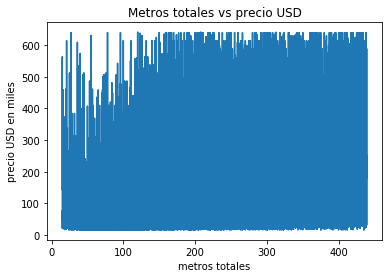

<Figure size 800x800 with 0 Axes>

In [287]:
p = prop_sorted['metrostotales']
# En miles de dólares
m = (prop_sorted['precio_USD'] / 1000)
plt.plot(p,m)
plt.xlabel('metros totales')
plt.ylabel('precio USD en miles')
plt.title('Metros totales vs precio USD')
plt.figure(num=None,figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
#.set_size_inches(18.5, 10.5, forward=True)
#plt.show()
#fig.set_size_inches(18.5, 10.5)

<Figure size 1600x1600 with 0 Axes>

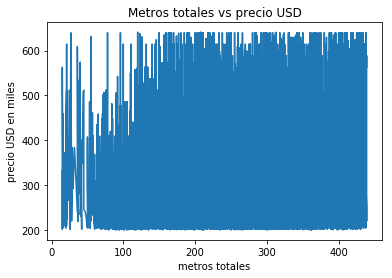

<Figure size 1600x1600 with 0 Axes>

In [289]:
prop_sorted_2 = prop_sorted[prop_sorted['precio_USD'] > 200000]
prop_sorted_2.head()
p2 = prop_sorted_2['metrostotales']
# En miles de dólares
m2 = (prop_sorted_2['precio_USD'] / 1000)
plt.plot(p2,m2)
plt.xlabel('metros totales')
plt.ylabel('precio USD en miles')
plt.title('Metros totales vs precio USD')
plt.figure(num=None,figsize=(20,20), dpi=80, facecolor='w', edgecolor='k')

## ¿Cuál es el precio promedio por ciudad por año para las 10 ciudades de mayor precio historico?

In [336]:
prop.head(2).transpose()

,11188,138118
id,192202,284662
titulo,terreno antes de cholul,casa uso de suelo en venta en abasolo
descripcion,"<p>justo antes del pueblo de cholul, excelente...","id:22939, <p>planta baja.- area comercial, ofi..."
tipodepropiedad,Terreno,Casa uso de suelo
direccion,merida,NaN
ciudad,Abalá,Abasolo
provincia,Yucatán,Nuevo León
antiguedad,0.00,NaN
habitaciones,NaN,3.00
garages,0.00,0.00


In [337]:
prop[['ciudad','precio_USD']].describe()

,precio_USD
count,240000.00
mean,129520.90
std,110161.30
min,15864.89
25%,48760.11
50%,94677.58
75%,173490.28
max,640992.84


In [338]:
prop_mean_year_city.head(5)

,year,ciudad,precio_USD_prom
0,2012,Acambay,23029.68
1,2012,Acapulco de Juárez,102178.87
2,2012,Acolman,35630.21
3,2012,Actopan,247239.00
4,2012,Aculco,281473.90


In [339]:
prop_mean_year_city_g = prop.groupby(['year','ciudad']).mean()['precio_USD']

In [340]:
prop_mean_year_city=prop_mean_year_city_g.reset_index().rename(columns={"precio_USD": "precio_USD_prom"})


Text(0.5, 1.0, 'Precio usd promedio por ciudad')

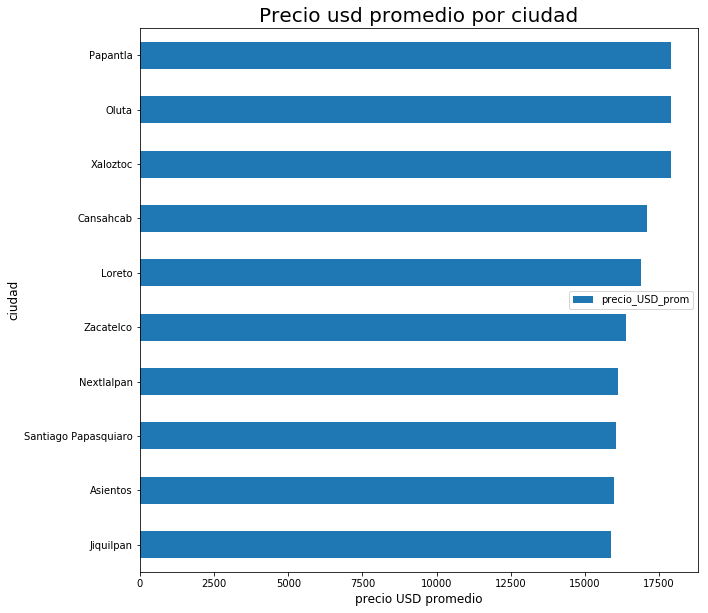

In [372]:
ax = prop_mean_year_city[prop_mean_year_city['year'] == 2012][['ciudad','precio_USD_prom']]\
.sort_values(by='precio_USD_prom',ascending=True).head(10).plot.barh(x='ciudad',y='precio_USD_prom',figsize=(10,10))
ax.set_xlabel('precio USD promedio',fontsize=12)
ax.set_ylabel('ciudad',fontsize=12)
ax.set_title('Precio usd promedio por ciudad',fontsize=20)

In [360]:
#Para exportar la imagen generada en el plot
#fig = ax.get_figure()
#fig.savefig('/tmp/img_export.png')

In [411]:
precio_mean_2012 = prop_mean_year_city[prop_mean_year_city['year']==2012].sort_values(by='precio_USD_prom',ascending=False)[['ciudad','precio_USD_prom']]
precio_mean_2013 = prop_mean_year_city[prop_mean_year_city['year']==2013].sort_values(by='precio_USD_prom',ascending=False)[['ciudad','precio_USD_prom']]
precio_mean_2014 = prop_mean_year_city[prop_mean_year_city['year']==2014].sort_values(by='precio_USD_prom',ascending=False)[['ciudad','precio_USD_prom']]
precio_mean_2015 = prop_mean_year_city[prop_mean_year_city['year']==2015].sort_values(by='precio_USD_prom',ascending=False)[['ciudad','precio_USD_prom']]
precio_mean_2016 = prop_mean_year_city[prop_mean_year_city['year']==2016].sort_values(by='precio_USD_prom',ascending=False)[['ciudad','precio_USD_prom']]

In [412]:
precio_m_anios = pd.DataFrame()
precio_m_anios[['ciudad','p_m_2012']] = precio_mean_2012[['ciudad','precio_USD_prom']]
precio_m_anios = precio_m_anios.set_index('ciudad')

In [413]:
precio_m_anios=precio_m_anios.join(precio_mean_2013.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2013"})
precio_m_anios=precio_m_anios.join(precio_mean_2014.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2014"})
precio_m_anios=precio_m_anios.join(precio_mean_2015.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2015"})
precio_m_anios=precio_m_anios.join(precio_mean_2016.set_index('ciudad')).rename(columns={"precio_USD_prom":"p_m_2016"})
precio_m_anios.head(10)

,p_m_2012,p_m_2013,p_m_2014,p_m_2015,p_m_2016
ciudad,,,,,
Batopilas,614124.87,nan,nan,nan,nan
Hunucmá,460593.65,nan,44012.28,nan,46059.37
Tenancingo,460593.65,166325.49,122824.97,198311.16,106517.40
Villa Victoria,450358.24,nan,nan,127942.68,193193.45
Tolimán,383828.05,nan,nan,51177.07,179119.75
PuruAndiro,332650.97,nan,nan,nan,nan
San Pablo del Monte,332650.97,nan,nan,nan,nan
Chignahuapan,332650.97,nan,29682.70,nan,nan
Moroleón,317297.85,nan,nan,16064.48,79665.64


Text(0.5, 1.0, 'Precio promedio USD vs Ciudad para las 10 ciudades con max historico')

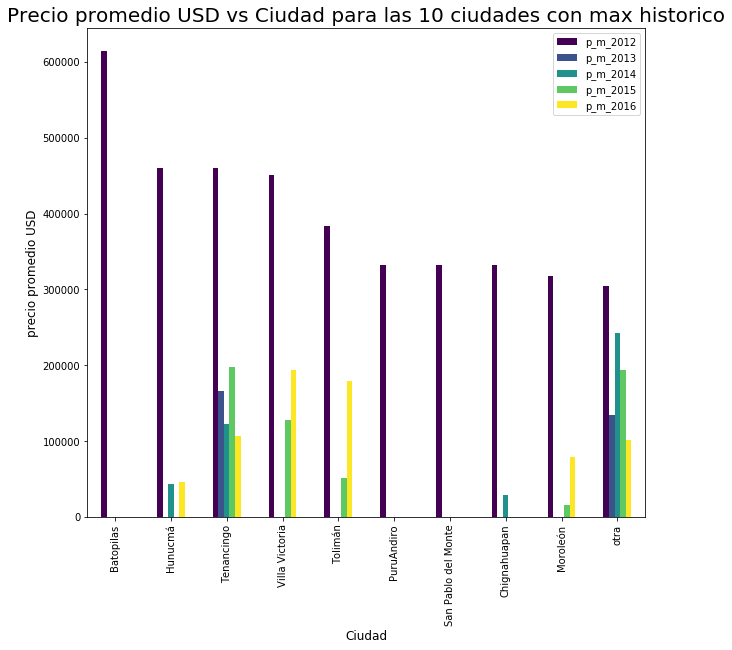

In [422]:
import matplotlib as mpl
#cmap = mpl.cm.cool
plot = precio_m_anios.head(10).plot.bar(figsize=(10,9),cmap='viridis')#'viridis',RdPu
plot.set_xlabel('Ciudad',fontsize=12)
plot.set_ylabel('precio promedio USD',fontsize=12)
plot.set_title('Precio promedio USD vs Ciudad para las 10 ciudades con max historico',fontsize=20)

## ¿Cómo se distribuyen las cantidades de publicaciones según la antiguedad en distintas ciudades?

In [435]:
prop.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,year,month,precio_USD,precioXmt,count
11188,192202,terreno antes de cholul,"<p>justo antes del pueblo de cholul, excelente...",Terreno,merida,Abalá,Yucatán,0.00,nan,0.00,nan,nan,200.00,nan,nan,nan,2013-09-22,0.00,0.00,0.00,0.00,0.00,315000.00,2013,9,16120.78,80.60,1
138118,284662,casa uso de suelo en venta en abasolo,"id:22939, <p>planta baja.- area comercial, ofi...",Casa uso de suelo,NaN,Abasolo,Nuevo León,nan,3.00,0.00,2.00,138.00,72.00,nan,25.65,-100.14,2016-04-24,0.00,0.00,0.00,0.00,0.00,680000.00,2016,4,34800.41,483.34,1


In [436]:
prop[prop['ciudad'] == 'Abasolo'][['antiguedad','year']]

,antiguedad,year
138118,nan,2016
30789,nan,2016
52476,nan,2015
13057,15.00,2013
152020,5.00,2014
117413,20.00,2016


In [437]:
labCyA = ['ciudad','antiguedad']
ciudades_ant = prop.groupby(by=labCyA).count()\
.reset_index()[labCyA].groupby(by='antiguedad').count()\
.sort_values('ciudad',ascending=False).reset_index()['ciudad']

Text(0.5, 1.0, 'Cantidad de ciudades con publicaciones por antiguedad de propiedad')

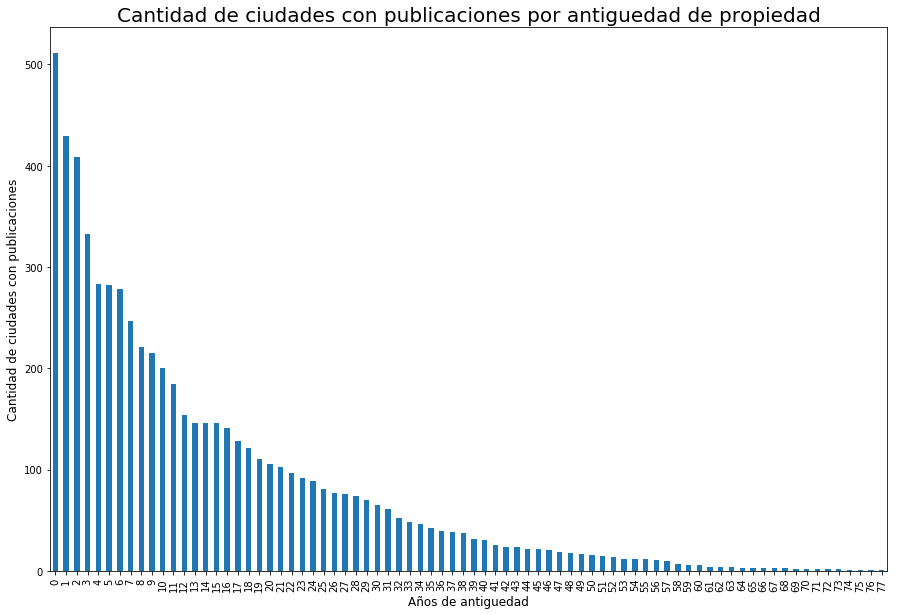

In [438]:
plot = ciudades_ant.plot(kind='bar',figsize=(15,10))
plot.set_xlabel('Años de antiguedad',fontsize=12)
plot.set_ylabel('Cantidad de ciudades con publicaciones',fontsize=12)
plot.set_title('Cantidad de ciudades con publicaciones por antiguedad de propiedad',fontsize=20)

In [269]:
#Se puede ver que existe una gran cantidad de ciudades distintas con departamentos nuevos, pero
#esa tendencia va disminuyendo a medida que aumenta la antiguedad.

## ¿Cuál es la antiguedad promedio según la ciudad?

In [240]:
prop_ant_mean = prop
prop_ant_mean['count'] = 1
prop_ant_mean = prop_ant_mean[['ciudad','antiguedad','count']]
prop_ant_mean.sort_values(by='ciudad',inplace=True)
pam = prop_ant_mean.groupby(by=['ciudad']).sum().reset_index()
pam['mean'] = pam.apply(lambda x: x[1]/x[2],axis=1)
pam = pam.rename(columns={'antiguedad':'antiguedad_total','mean':'mean_antiguedad'})

/home/lucas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [231]:
pam = pam.sort_values(by='mean_antiguedad')
pam.tail()

,ciudad,antiguedad_total,count,mean_antiguedad
502,Poanas,35.00,1,35.00
7,Acateno,35.00,1,35.00
710,Tepetitlán,181.00,5,36.20
14,Acuitzio,50.00,1,50.00
17,Agua Dulce,80.00,1,80.00


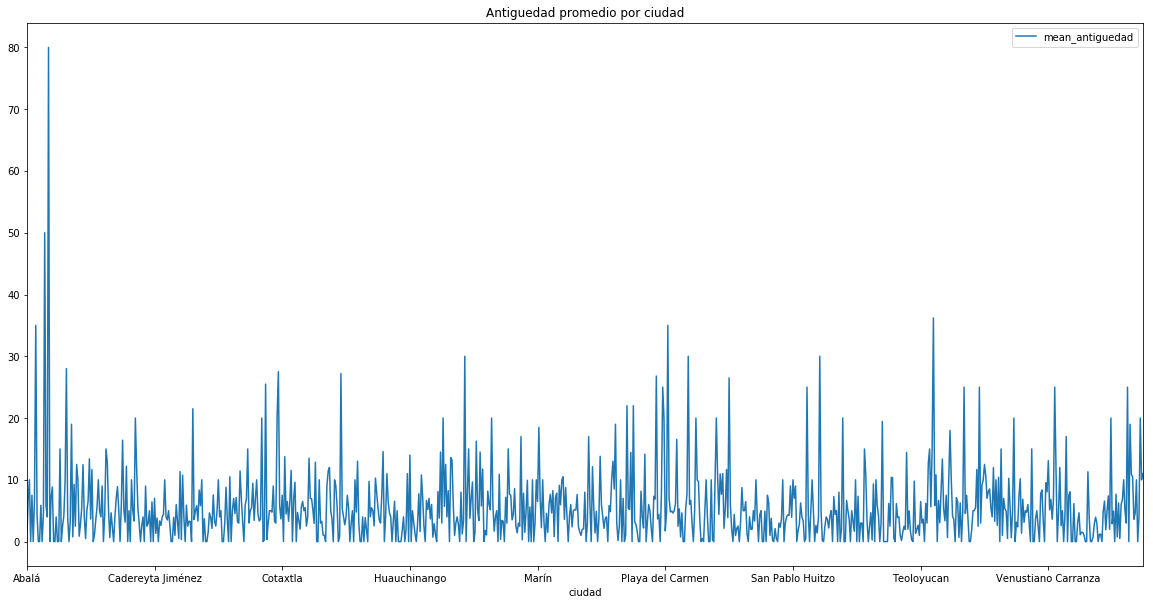

In [245]:
#pam['mean_antiguedad'].plot(kind='bar',legend=False,width=0.5,figsize=(20,10),cmap='Reds')
pam[['mean_antiguedad','ciudad']].set_index('ciudad').plot(figsize=(20,10),title='Antiguedad promedio por ciudad')          

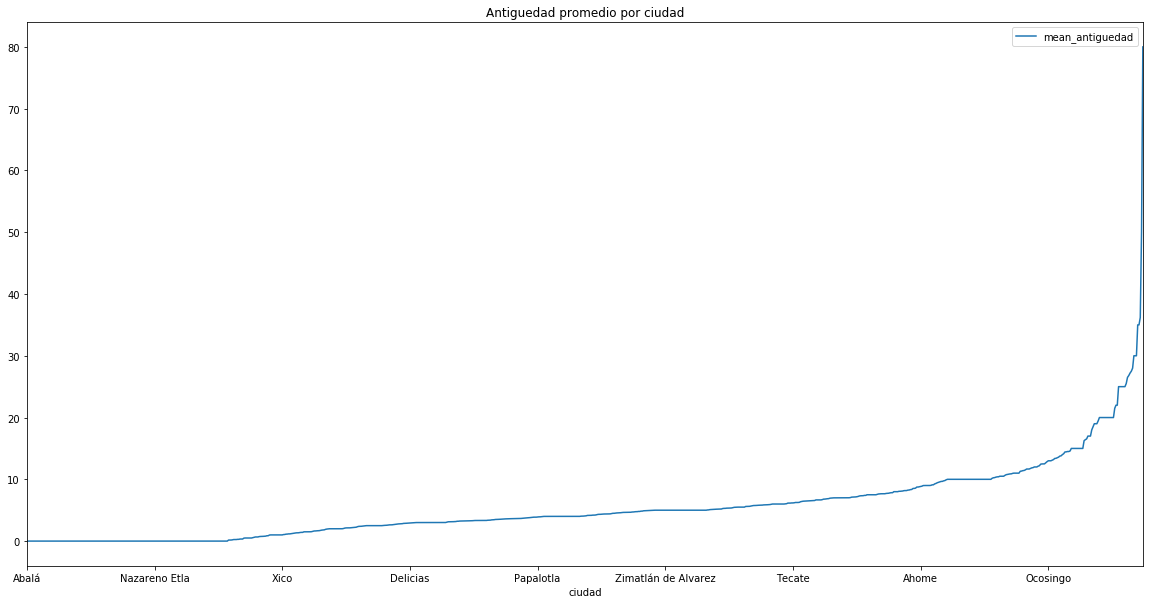

In [329]:
pam[['mean_antiguedad','ciudad']].sort_values(by='mean_antiguedad').set_index('ciudad').plot(figsize=(20,10),title='Antiguedad promedio por ciudad')          

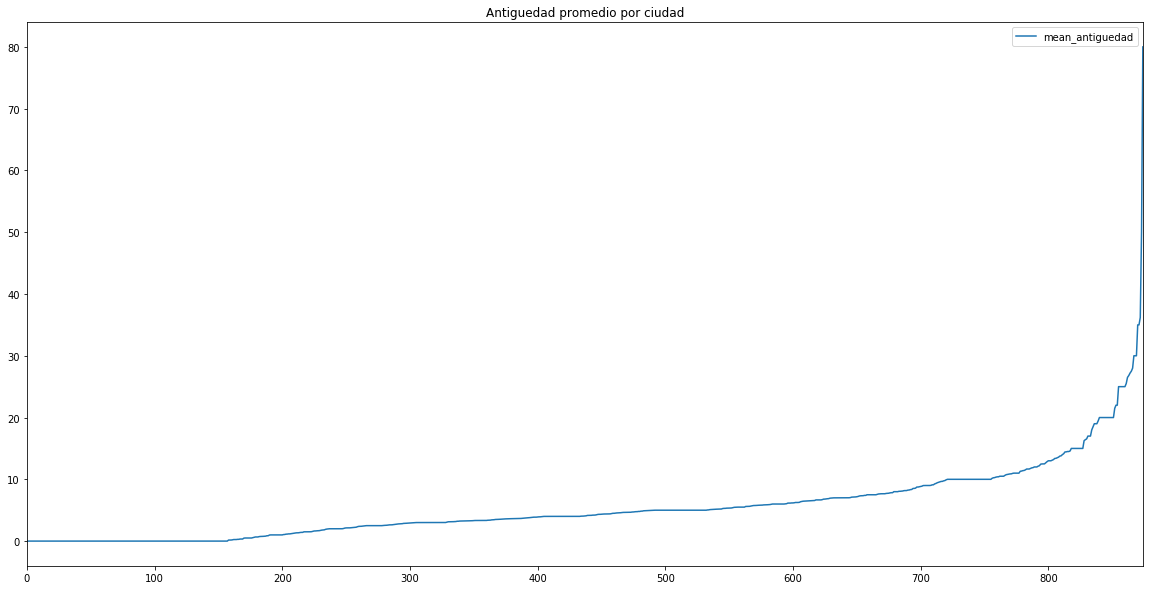

In [333]:
pam[['mean_antiguedad','ciudad']].sort_values(by='mean_antiguedad').reset_index()[['mean_antiguedad','ciudad']]\
.plot(figsize=(20,10),title='Antiguedad promedio por ciudad')

In [335]:
pam['ciudad'].count()

875